En el archivo crime_data.csv se encuentra el número de crímenes por cada 100.000 habitantes en cada uno
de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han
agrupado en: asalto, asesinato y violación.
Se va segmentar este conjunto de datos utilizando k-means de manera que se puedan obtener los centroides de cada clúster y el listado de los
estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se
divide el conjunto de datos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
crimen = pd.read_csv('crime_data.csv')
columns = list(crimen.columns)
columns.remove('State')
crimen.head(10)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#NORMALIZACION

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(crimen[columns])
data_norm = scaler.transform(crimen[columns])
data_norm = pd.DataFrame(data_norm, columns= ['Murder', 'Assault', 'UrbanPop', 'Rape'])
columns = list(data_norm.columns)
columns.remove('UrbanPop')

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


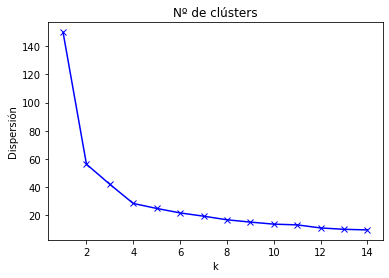

In [4]:
def plot_dispersion(x, figure_name, max_k = 15, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)
    plt.show()

plot_dispersion(data_norm[columns], 'Nº de clústers')

El número de clúster es 2. Usaremos Sillhouette para confirmarlo.

In [5]:
def plot_sillhouette(blobs, figura, max_k=15, n_init=10):
    sillhouette_avgs = []

    for k in range(2, max_k):
        kmean = KMeans(n_clusters=k, n_init=n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))

    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.title(figura)
    plt.show()
    return 2 + sillhouette_avgs.index(max(sillhouette_avgs))


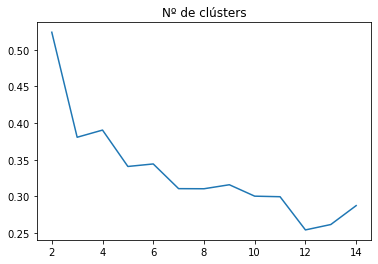

2

In [6]:
n = plot_sillhouette(data_norm[columns], 'Nº de clústers')
n

El número de clústers es 2

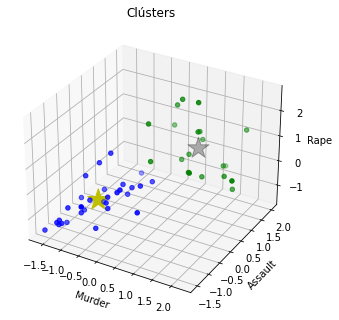

In [7]:

color_map = np.array(['b','g','r','c','m','y','k'])

kmeans = KMeans(n_clusters = n,
                random_state = 1).fit(data_norm[columns])
classes = kmeans.predict(data_norm[columns])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_norm['Murder'], data_norm['Assault'], data_norm['Rape'], color = color_map[classes])
ax.scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        kmeans.cluster_centers_[:, 2],
        marker = '*',
        color = color_map[-n:],
        s = 500
        )

ax.set_title('Clústers')
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
plt.show()

En esta gráfica podemos apreciar bien los dos clúster, estos quedan bien definidos.

In [8]:
Estados = pd.DataFrame({'Estado': crimen['State'], 'Clúster': kmeans.labels_})

Se muestran los estados agrupados por su correpondiente clúster

In [9]:
Estados[Estados['Clúster']==0]

,Estado,Clúster
3,Arkansas,0
6,Connecticut,0
7,Delaware,0
10,Hawaii,0
11,Idaho,0
13,Indiana,0
14,Iowa,0
15,Kansas,0
16,Kentucky,0
18,Maine,0


In [10]:
Estados[Estados['Clúster']==1]

,Estado,Clúster
0,Alabama,1
1,Alaska,1
2,Arizona,1
4,California,1
5,Colorado,1
8,Florida,1
9,Georgia,1
12,Illinois,1
17,Louisiana,1
19,Maryland,1
